<a href="https://colab.research.google.com/github/Chandana2217/EliteTech-Intern/blob/main/TASK_3_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 3:**

**IMAGE CLASSIFICATION MODEL**
**BUILD A CONVOLUTIONAL NEURAL NETWORK**
**(CNN) FOR IMAGE CLASSIFICATION USING**
**TENSORFLOW OR PYTORCH.**
**DELIVERABLE: A FUNCTIONAL MODEL WITH**
**PERFORMANCE EVALUATION ON A TEST**
**DATASET.**

**Import necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**1️⃣ Load the built-in CIFAR-10 dataset**

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

**Normalize pixel values (0–255) to (0–1)**

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

**Class names for visualization**

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

**Display a few training images**

/tmp/ipython-input-1850230323.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


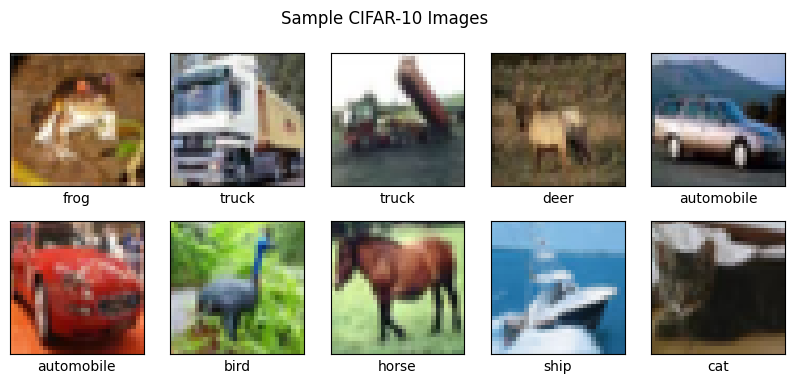

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.suptitle("Sample CIFAR-10 Images")
plt.show()

**2️⃣ Build the CNN model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

**Show model summary**

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

**3️⃣ Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**4️⃣ Train the model**

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.3619 - loss: 1.7345 - val_accuracy: 0.5591 - val_loss: 1.2282
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5755 - loss: 1.1970 - val_accuracy: 0.6124 - val_loss: 1.0928
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.6387 - loss: 1.0317 - val_accuracy: 0.6488 - val_loss: 1.0031
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.6742 - loss: 0.9238 - val_accuracy: 0.6754 - val_loss: 0.9378
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.7059 - loss: 0.8382 - val_accuracy: 0.6741 - val_loss: 0.9498
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7294 - loss: 0.7744 - val_accuracy: 0.6875 - val_loss: 0.9016
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7473 - loss: 0.7227 - val_accuracy: 0.6894 - val_loss: 0.9123
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7678 -

**5️⃣ Evaluate model on test data**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

313/313 - 3s - 11ms/step - accuracy: 0.7089 - loss: 0.8859

✅ Test Accuracy: 0.7089


**6️⃣ Plot training and validation accuracy/loss**

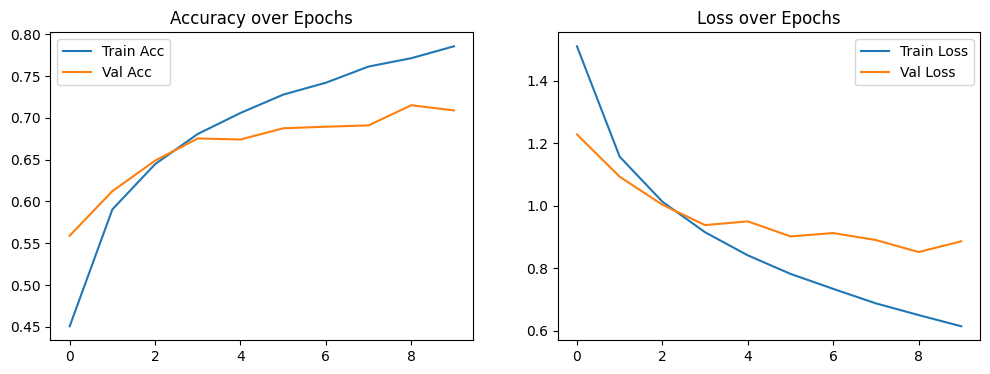

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()

**7️⃣ Predict a few images**

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


**Show predictions**

/tmp/ipython-input-272401770.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(y_test[i])]} \nPred: {class_names[y_pred_classes[i]]}")


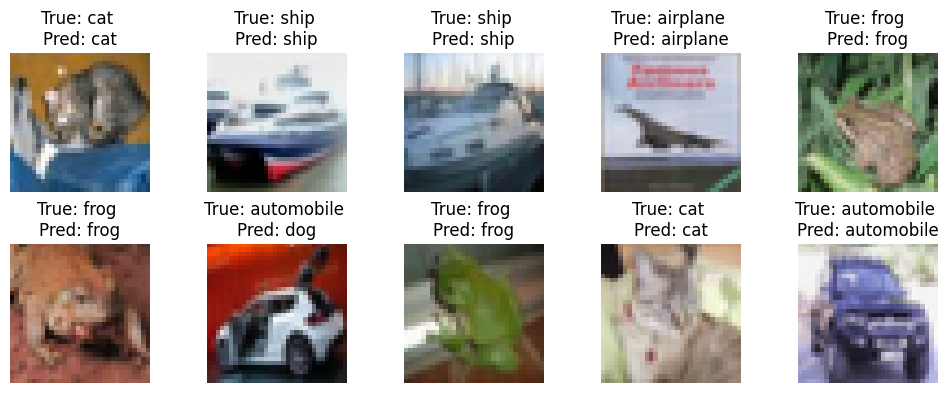

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[int(y_test[i])]} \nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()